<a href="https://colab.research.google.com/github/gguex/ISH_ressources_cours_ML/blob/main/TP3_!corrige.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Pour modifier la taille de sortie de graphiques dans le notebook
plt.rcParams['figure.figsize'] = [15, 8]
# Les modèles de régression
from sklearn.linear_model import LinearRegression, LogisticRegression
# Pour la CV
from sklearn.model_selection import train_test_split, GridSearchCV
# Nos score F1
from sklearn.metrics import f1_score
# Pour encoder les sorties en vecteurs one-hot
from sklearn.preprocessing import OneHotEncoder

In [2]:
# On charge le fichier de données
file_path = "drive/MyDrive/Colab Notebooks/ml_data/TP3/PimaIndiansDiabetes.csv"
data = pd.read_csv(file_path)
data 

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,1,85,66,29,0,26.6,0.351,31,neg
2,8,183,64,0,0,23.3,0.672,32,pos
3,1,89,66,23,94,28.1,0.167,21,neg
4,0,137,40,35,168,43.1,2.288,33,pos
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,neg
764,2,122,70,27,0,36.8,0.340,27,neg
765,5,121,72,23,112,26.2,0.245,30,neg
766,1,126,60,0,0,30.1,0.349,47,pos


In [3]:
# Les inputs sont toutes les données sauf "diabetes"
inputs = data.drop("diabetes", axis=1)
# Les sorties sont la variable "diabetes", qu'on transforme en variable binaire
outputs = (data["diabetes"].to_numpy() == "pos")*1
# On sépare en jeux d'entrainement/validation et test
inputs_train_val, inputs_test, outputs_train_val, outputs_test \
  = train_test_split(inputs, outputs, test_size=0.2, stratify=outputs)

In [4]:
# On fait le modèle linéaire
linear_reg = LinearRegression()
linear_reg.fit(inputs_train_val, outputs_train_val)

LinearRegression()

In [5]:
# On calcule les prédictions
outputs_lin_train = (linear_reg.predict(inputs_train_val) > 0.5)*1
outputs_lin_test = (linear_reg.predict(inputs_test) > 0.5)*1
# On calcule le F1 train et test
f1_lin_train = f1_score(outputs_train_val, outputs_lin_train)
f1_lin_test = f1_score(outputs_test, outputs_lin_test)

In [6]:
# Paramètres pour la CV
params = np.linspace(0.001, 5, 50)
param_dict = {"C": params}
k = 5
# Modèle avec un peu plus d'itérations (1e4 = 1000)
logistic_reg = LogisticRegression(max_iter=1e4)
# Recherche sur grille avec CV
grid_search = GridSearchCV(logistic_reg, 
                            param_dict,
                            cv=k,
                            scoring="f1")
grid_search.fit(inputs_train_val, outputs_train_val)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000.0),
             param_grid={'C': array([1.00000000e-03, 1.03020408e-01, 2.05040816e-01, 3.07061224e-01,
       4.09081633e-01, 5.11102041e-01, 6.13122449e-01, 7.15142857e-01,
       8.17163265e-01, 9.19183673e-01, 1.02120408e+00, 1.12322449e+00,
       1.22524490e+00, 1.32726531e+00, 1.42928571e+00, 1.53130612e+00,
       1.63332653e+00, 1.73534...
       2.44948980e+00, 2.55151020e+00, 2.65353061e+00, 2.75555102e+00,
       2.85757143e+00, 2.95959184e+00, 3.06161224e+00, 3.16363265e+00,
       3.26565306e+00, 3.36767347e+00, 3.46969388e+00, 3.57171429e+00,
       3.67373469e+00, 3.77575510e+00, 3.87777551e+00, 3.97979592e+00,
       4.08181633e+00, 4.18383673e+00, 4.28585714e+00, 4.38787755e+00,
       4.48989796e+00, 4.59191837e+00, 4.69393878e+00, 4.79595918e+00,
       4.89797959e+00, 5.00000000e+00])},
             scoring='f1')

[]

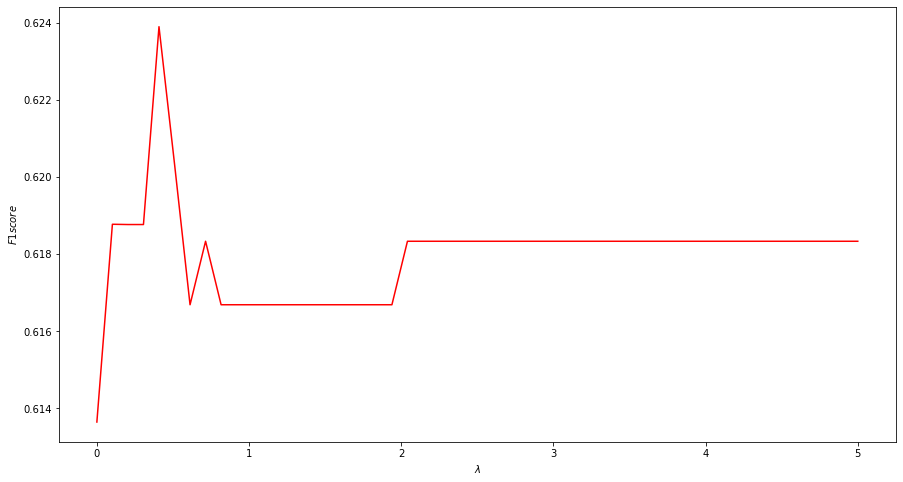

In [7]:
# Plot des scores
f1_scores = grid_search.cv_results_["mean_test_score"]
# Plot des scores
fig, ax = plt.subplots()
ax.plot(params, f1_scores, c="red")
ax.set_xlabel("$\lambda$")
ax.set_ylabel("$F1 score$")
plt.plot()

In [8]:
# On sauve le meilleur modèle
best_C = grid_search.best_params_["C"]
best_log_reg = grid_search.best_estimator_
# Les prédictions
outputs_log_train = best_log_reg.predict(inputs_train_val)
outputs_log_test = best_log_reg.predict(inputs_test)
# Les scores f1
f1_log_train = f1_score(outputs_train_val, outputs_log_train)
f1_log_test = f1_score(outputs_test, outputs_log_test)

In [9]:
print(f"Le F1 pour le modèle linéaire est de "
f"{f1_lin_train:.2%} (train) {f1_lin_test:.2%} (test)")
print(f"Le F1 pour le modèle logistique (C={best_C:.4f}) est "
f"de {f1_log_train:.2%} (train) {f1_log_test:.2%} (test)")

Le F1 pour le modèle linéaire est de 63.30% (train) 60.87% (test)
Le F1 pour le modèle logistique (C=0.4091) est de 63.87% (train) 65.96% (test)
